In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys
sys.path.append('/home/avic/Rotation-Generalization')
from dataset_path import DatasetPath, DatasetType
from scipy.spatial.transform import Rotation as R

In [2]:
FIGURE_PATH = '/home/avic/Rotation-Generalization/notebooks/figures/paradigm/models'

In [3]:
img_border = 60
top_border = 55

In [4]:
def imgOpen(path):
    return np.array(Image.open(path).convert('RGBA').crop((img_border,top_border, 224-img_border, 224-top_border)))

In [11]:
images = np.empty((15,9,224-(2*top_border),224-(2*img_border), 4))

In [12]:
plt.close('all')
for MODEL_I in range(15):
    for rotation_i in range(9):
        images[MODEL_I, rotation_i] = imgOpen(os.path.join(FIGURE_PATH, f'model{MODEL_I}', f'image{rotation_i}.png'))

In [13]:
images = images[[0,1,2,3,5,6,8,9,10,11,12,13,14]]
images = images[:,[0,1,3,4,5,8]]
images = images / 255
images[:,:,:,:2] = [0.5,0.5,0.5,1]
images[:,:,:,-2:] = [0.5,0.5,0.5,1]
images[...,3] = images[...,0] > (100 / 255)
images_reshaped = np.transpose(images, (1,2,0,3,4)).reshape((224 - (2 * top_border) * 9, (224 - (2 * img_border)) * 13, 4))
images_reshaped[:,:4] = [0.5,0.5,0.5,1]
images_reshaped[:,-4:] = [0.5,0.5,0.5,1]

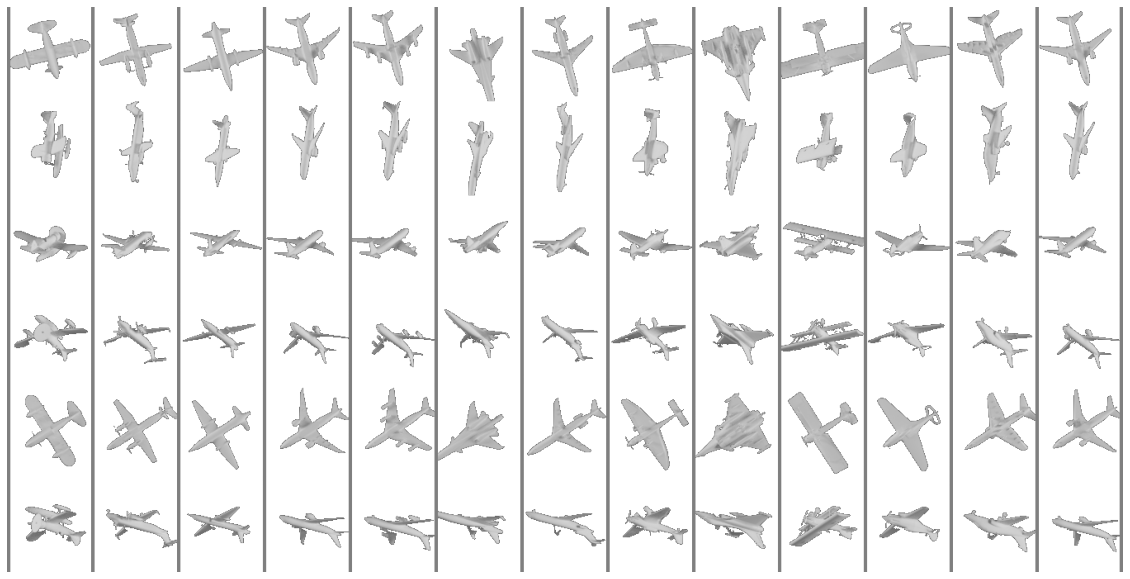

In [14]:
plt.close('all')
fig, ax = plt.subplots(figsize=(20,20))
plt.yticks([])
plt.xticks([])
plt.imshow(images_reshaped)
fig.patch.set_visible(False)
ax.axis('off')
plt.savefig('/home/avic/Rotation-Generalization/notebooks/figures/paradigm/combined_distributions.png', dpi=400, transparent=True, bbox_inches='tight')

In [5]:
categories = fd.model_name.unique()

In [6]:
rotation_ranges = []
for i in range(6):
#     rotation = R.random().as_euler('zyx')
    rotation = [np.array([2,-0.5,0]),np.array([-2,0.5,0]),np.array([0,1,0]),np.array([0,-1,0]),np.array([2,-1,0]),np.array([-2,1,0])][i]
#     while (-0.6 < rotation[0] < 0.6) and (-0.6 < rotation[1] < 0.6):
#         rotation = R.random().as_euler('zyx')
    rotation_ranges.append(list(zip(rotation - 0.1, rotation + 0.1)))

In [26]:
images = np.empty((50,9,224-(2*top_border),224-(2*img_border),4))
non_eligible_catagories = []
for x in range(50):
    for y in range(9):
        if y < 3:
            object_z_range = [0.3, -1, 1.7][y]
            object_z_range = (object_z_range - 0.1, object_z_range + 0.1)
            possible_images = bd[(bd.model_name == categories[x]) & bd.object_z.between(object_z_range[0], object_z_range[1])]
        else:
            rr = rotation_ranges[y-3]
            possible_images = fd[(fd.model_name == categories[x]) & fd.object_x.between(rr[0][0],rr[0][1]) & fd.object_y.between(rr[1][0], rr[1][1])]
        if len(possible_images) == 0:
            non_eligible_catagories.append(x)
            continue
        images[x,y] = imgOpen(possible_images.sample(n=1).iloc[0])
images = images / 255

In [27]:
len(set(non_eligible_catagories))

2

In [28]:
images = images[[i for i in range(50) if i not in np.array(list(set(non_eligible_catagories)))]][:20]

In [30]:
images[...,3] = images[...,0] > (100 / 255)

In [31]:
images.shape

(20, 9, 114, 104, 4)

In [32]:
images_reshaped = np.transpose(images, (1,2,0,3,4)).reshape((224 - (2 * top_border) * 9, (224 - (2 * img_border)) * 20, 4))

In [ ]:
images = np.stack([np.stack(np.array([imgOpen(img) for img in fd[fd.model_name == categories[i]].sample(n=6).itertuples()])) for i in range(20)]) / 255

In [33]:
images_reshaped[:,:4] = [0.5,0.5,0.5,1]
images_reshaped[:,-4:] = [0.5,0.5,0.5,1]

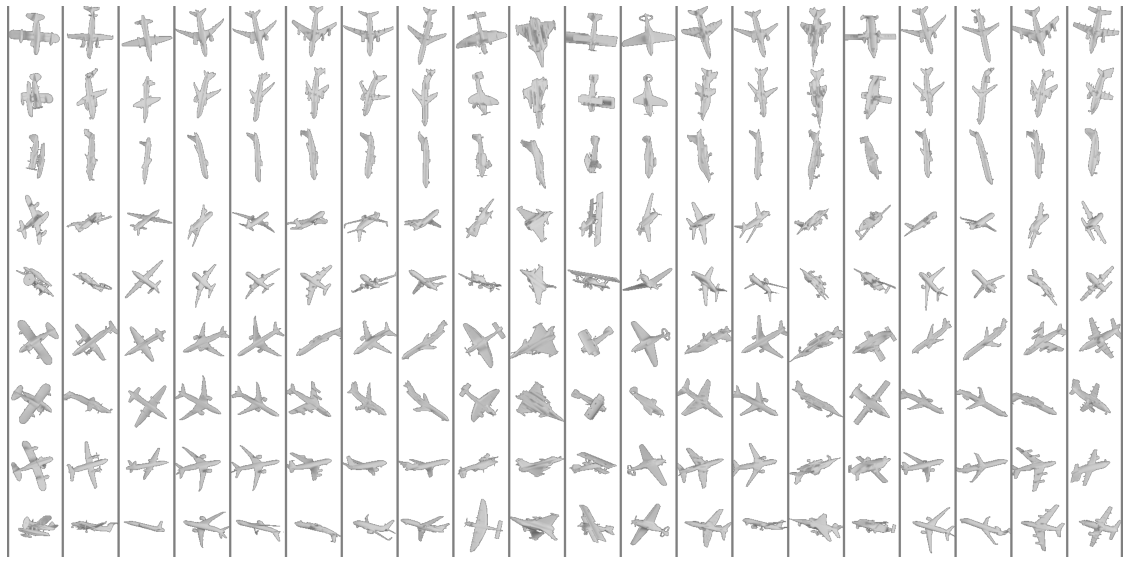

In [34]:
plt.close('all')
fig, ax = plt.subplots(figsize=(20,20))
plt.yticks([])
plt.xticks([])
plt.imshow(images_reshaped)
fig.patch.set_visible(False)
ax.axis('off')
plt.savefig('/home/avic/Rotation-Generalization/notebooks/figures/paradigm/combined_distributions.png', dpi=400, transparent=True, bbox_inches='tight')

In [2]:
FULL_DATASET_PATH = DatasetPath('plane', DatasetType.Full, False, (0,1))
BIN_DATASET_PATH = DatasetPath('plane', DatasetType.Bin, False, (0,1))

fd = pd.read_csv(FULL_DATASET_PATH.merged_annotation_path())
fd = fd[~fd.object_x.between(-0.3, 0,3) & ~fd.object_y.between(-0.3, 0,3)]
bd = pd.read_csv(BIN_DATASET_PATH.merged_annotation_path())

In [ ]:
plt.close('all')
fig, axes = plt.subplots(1, 20, figsize=(15, 15))
for i in range(20):
#     axes[x][y].imshow(imgOpen(d[(d.model_name == categories[1 + i]) & (d.object_x.between(-1, -0.5)) & (d.object_y.between(0.2, 0.5)) & (d.object_z.between(1.5, 3))].sample(n=1).iloc[0]))
#     axes[i].imshow(np.transpose(np.stack(np.array([imgOpen(img) for img in bd[bd.model_name == categories[i]].sample(n=6).itertuples()])), (1,0,2,3)).reshape((224 - (2 * img_border), (224 - (2 * img_border)) * 6, 3)))
    axes[i].imshow(np.stack(np.array([imgOpen(img) for img in bd[bd.model_name == categories[i]].sample(n=6).itertuples()])).reshape((224 - (2 * img_border) * 6, (224 - (2 * img_border)) * 20, 3)))
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.